Regression Analysis-Using Monthly Returns and Breakeven

In [ ]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 22.4 MB/s 
     |████████████████████████████████| 231 kB 52.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

commodities_be = pd.read_csv('Monthly BE.csv') 

commodities_be.head()

,Dates,MSCI World Net Total Return Lo,Bloomberg Commodity Index,S&P GSCI Energy Official Close,S&P GSCI Industrial Metals Off,S&P GSCI Precious Metals Offic,S&P GSCI Agriculture Official,S&P GSCI Gold Official Close I,Breakeven Changes
0,31/08/1992,0.004923,-0.013333,-0.001292,-0.009294,-0.047853,-0.021707,-0.044549,0.00082
1,30/09/1992,-0.000094,0.012259,0.005957,-0.051998,0.012023,0.011042,0.011874,0.00196
2,30/10/1992,0.008713,-0.031752,-0.038102,-0.076796,-0.025025,0.007730,-0.026618,-0.00148
3,30/11/1992,0.033341,-0.011078,-0.054195,0.000293,-0.010699,0.038031,-0.017420,0.00193
4,31/12/1992,0.009797,-0.003307,-0.009732,0.024492,-0.011010,-0.017561,-0.007154,-0.00332


In [ ]:
commodities_be.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dates                           349 non-null    object 
 1   MSCI World Net Total Return Lo  349 non-null    float64
 2   Bloomberg Commodity Index       349 non-null    float64
 3   S&P GSCI Energy Official Close  349 non-null    float64
 4   S&P GSCI Industrial Metals Off  349 non-null    float64
 5   S&P GSCI Precious Metals Offic  349 non-null    float64
 6   S&P GSCI Agriculture Official   349 non-null    float64
 7   S&P GSCI Gold Official Close I  349 non-null    float64
 8   Breakeven Changes               349 non-null    float64
dtypes: float64(8), object(1)
memory usage: 24.7+ KB


In [ ]:
commodities_be['Dates'] =pd.to_datetime(commodities_be['Dates'])

In [ ]:
commodities_be.columns

Index(['Dates', 'MSCI World Net Total Return Lo', 'Bloomberg Commodity Index',
       'S&P GSCI Energy Official Close', 'S&P GSCI Industrial Metals Off',
       'S&P GSCI Precious Metals Offic', 'S&P GSCI Agriculture Official',
       'S&P GSCI Gold Official Close I', 'Breakeven Changes'],
      dtype='object')

In [ ]:
commodities_be.columns = ['Dates', 'MSCI_World', 'Bloomberg_Commodity_Index','Energy', 'Industrial_Metals','Precious_Metals', 'Agriculture','Gold', 'BE']

In [ ]:
commodities_be.set_index('Dates', inplace= True)

Rolling regression result for MSCI_World as target


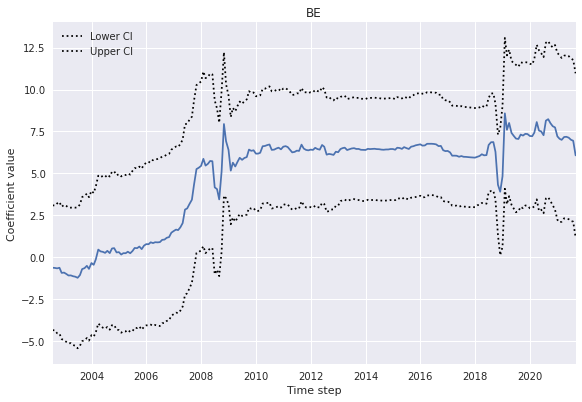

Rolling regression result for Bloomberg_Commodity_Index as target


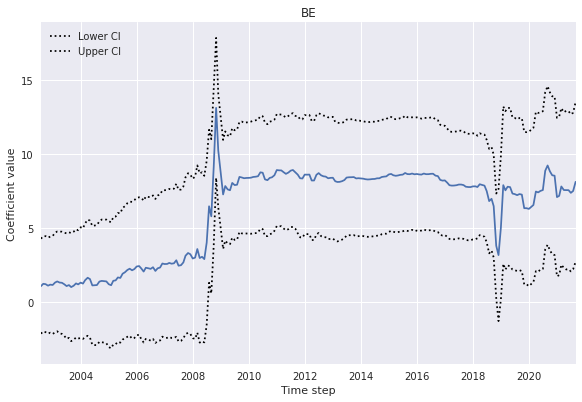

Rolling regression result for Energy as target


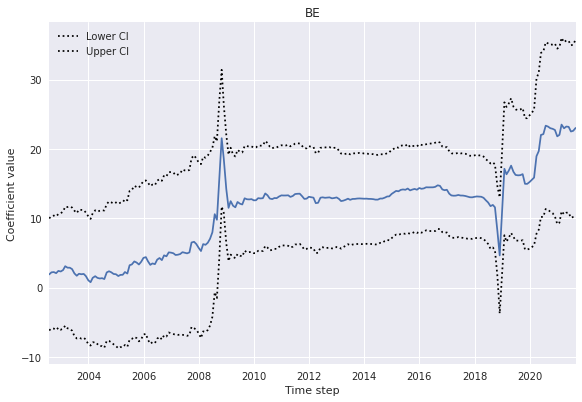

Rolling regression result for Industrial_Metals as target


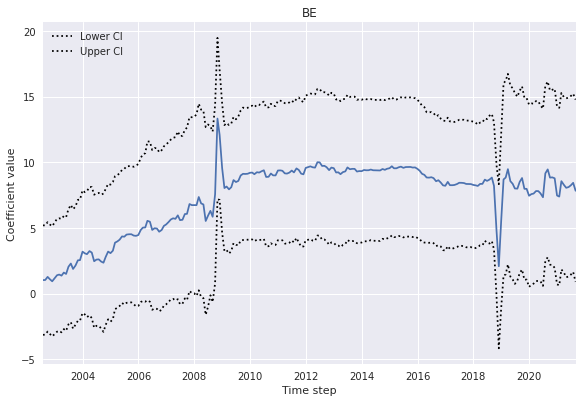

Rolling regression result for Precious_Metals as target


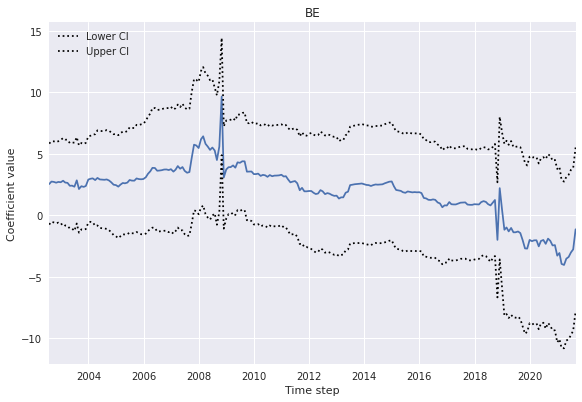

Rolling regression result for Agriculture as target


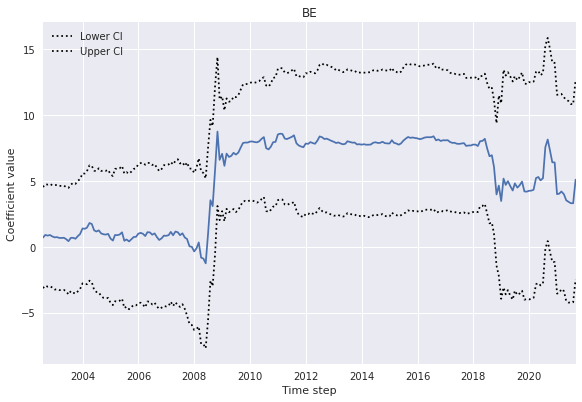

Rolling regression result for Gold as target


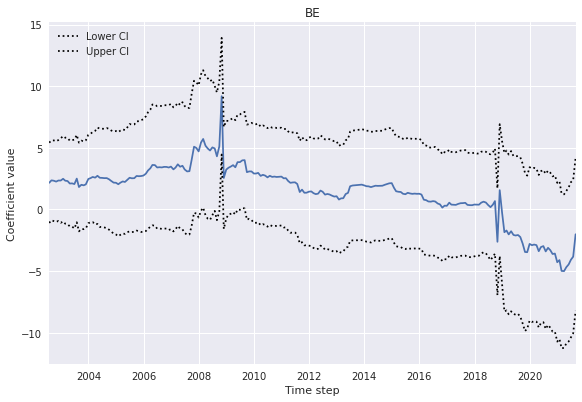

In [ ]:
from statsmodels.regression.rolling import RollingOLS

Sectors = ['MSCI_World', 'Bloomberg_Commodity_Index', 'Energy','Industrial_Metals', 'Precious_Metals', 'Agriculture', 'Gold']


for item in Sectors:
    roll_reg = RollingOLS.from_formula(f'{item} ~ BE', window=120, data=commodities_be)
    model = roll_reg.fit()
    print(f'Rolling regression result for {item} as target')

    fig = model.plot_recursive_coefficient(variables=['BE'])
    plt.xlabel('Time step')
    plt.ylabel('Coefficient value')
    plt.show()
   

In [ ]:
commodities_be['BE'].autocorr(lag=1)

0.037264321790909466

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

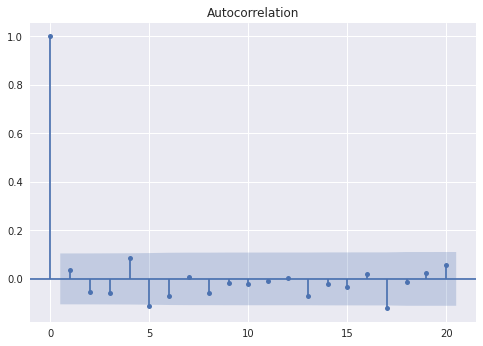

In [ ]:
sm.graphics.tsa.plot_acf(commodities_be['BE'].dropna(), lags=20)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9fd396c-9c1e-4ca6-8dc8-2011fa1e8fc7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>